# ***Regresión: Velocidad del viento***

Carga de datos desde el repositorio de `GitHub`

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0



df = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/refs/heads/main/wind_speed/data_treino_dv_df_2000_2010.csv', encoding='latin1')#.head(500)    
df.head()

,HORA (UTC),"VENTO, DIREÃ¯Â¿Â½Ã¯Â¿Â½O HORARIA (gr) (Ã¯Â¿Â½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA MÃ¯Â¿Â½XIMA NA HORA ANT. (AUT) (Ã¯Â¿Â½C),TEMPERATURA MÃ¯Â¿Â½NIMA NA HORA ANT. (AUT) (Ã¯Â¿Â½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAÃ¯Â¿Â½Ã¯Â¿Â½O TOTAL, HORÃ¯Â¿Â½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSÃ¯Â¿Â½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃ¯Â¿Â½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.81,1.80,69.00,60.00,22.60,20.70,61.00,888.20,0.00,3.80,888.20,887.70
1,13:00,0.97,2.70,62.00,55.00,24.20,22.50,55.00,888.40,0.00,4.70,888.40,888.20
2,14:00,0.89,2.00,56.00,50.00,25.50,24.30,51.00,888.10,0.00,4.90,888.40,888.10
3,15:00,0.85,2.50,52.00,44.00,27.40,25.00,44.00,887.40,0.00,5.80,888.10,887.40
4,16:00,0.22,2.40,50.00,43.00,27.10,25.50,46.00,886.50,0.00,5.80,887.40,886.50


In [2]:
display("Initial columns:")
display(df.columns.tolist())

# Dictionary to rename columns with simpler, cleaner names
rename_columns = {
    'HORA (UTC)': 'hora',
    'VENTO, DIREÃ¯Â¿Â½Ã¯Â¿Â½O HORARIA (gr) (Ã¯Â¿Â½ (gr))': 'dir_viento',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'vel_viento',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'hum_max_ant',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'hum_min_ant',
    'TEMPERATURA MÃ¯Â¿Â½XIMA NA HORA ANT. (AUT) (Ã¯Â¿Â½C)': 'temp_max_ant',
    'TEMPERATURA MÃ¯Â¿Â½NIMA NA HORA ANT. (AUT) (Ã¯Â¿Â½C)': 'temp_min_ant',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'hum_rel_hora',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'presion_hora',
    'PRECIPITAÃ¯Â¿Â½Ã¯Â¿Â½O TOTAL, HORÃ¯Â¿Â½RIO (mm)': 'precipitacion_hora',
    'VENTO, RAJADA MAXIMA (m/s)': 'rafaga_max',
    'PRESSÃ¯Â¿Â½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'presion_max_ant',
    'PRESSÃ¯Â¿Â½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'presion_min_ant'
}

# Apply renaming to the DataFrame
df = df.rename(columns=rename_columns)

display("Renamed columns:")
display(df.columns.tolist())


'Initial columns:'

['HORA (UTC)',
 'VENTO, DIREÃ¯Â¿Â½Ã¯Â¿Â½O HORARIA (gr) (Ã¯Â¿Â½ (gr))',
 'VENTO, VELOCIDADE HORARIA (m/s)',
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
 'TEMPERATURA MÃ¯Â¿Â½XIMA NA HORA ANT. (AUT) (Ã¯Â¿Â½C)',
 'TEMPERATURA MÃ¯Â¿Â½NIMA NA HORA ANT. (AUT) (Ã¯Â¿Â½C)',
 'UMIDADE RELATIVA DO AR, HORARIA (%)',
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
 'PRECIPITAÃ¯Â¿Â½Ã¯Â¿Â½O TOTAL, HORÃ¯Â¿Â½RIO (mm)',
 'VENTO, RAJADA MAXIMA (m/s)',
 'PRESSÃ¯Â¿Â½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
 'PRESSÃ¯Â¿Â½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)']

'Renamed columns:'

['hora',
 'dir_viento',
 'vel_viento',
 'hum_max_ant',
 'hum_min_ant',
 'temp_max_ant',
 'temp_min_ant',
 'hum_rel_hora',
 'presion_hora',
 'precipitacion_hora',
 'rafaga_max',
 'presion_max_ant',
 'presion_min_ant']

In [3]:
# Ver dimensiones del dataset
print(f"Filas y columnas: {df.shape[0]} filas, {df.shape[1]} columnas\n")

# Ver tipos de datos
print("Tipos de datos por columna:")
print(df.dtypes)

# Ver número de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Filas y columnas: 87693 filas, 13 columnas

Tipos de datos por columna:
hora                   object
dir_viento            float64
vel_viento            float64
hum_max_ant           float64
hum_min_ant           float64
temp_max_ant          float64
temp_min_ant          float64
hum_rel_hora          float64
presion_hora          float64
precipitacion_hora    float64
rafaga_max            float64
presion_max_ant       float64
presion_min_ant       float64
dtype: object

Valores nulos por columna:
hora                  0
dir_viento            0
vel_viento            0
hum_max_ant           0
hum_min_ant           0
temp_max_ant          0
temp_min_ant          0
hum_rel_hora          0
presion_hora          0
precipitacion_hora    0
rafaga_max            0
presion_max_ant       0
presion_min_ant       0
dtype: int64


***Observación:***

Siendo la variable hora de tipo "object", tendremos que convertirla a tipo "tiempo" para procesarla correctamente.

In [4]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")


Filas duplicadas: 0


***Observación:***

Los datos no presentan nulos, ni duplicados.

In [5]:
# Descriptivo extendido con percentiles específicos
df.describe(percentiles=[0.25, 0.5, 0.75]).T


,count,mean,std,min,25%,50%,75%,max
dir_viento,87693.00,0.41,0.69,-1.00,-0.16,0.79,0.97,1.00
vel_viento,87693.00,2.47,1.31,0.00,1.50,2.40,3.40,10.00
hum_max_ant,87693.00,69.06,19.64,12.00,54.00,72.00,87.00,100.00
hum_min_ant,87693.00,63.18,20.17,10.00,48.00,64.00,80.00,98.00
temp_max_ant,87693.00,21.92,3.72,9.20,19.20,21.40,24.70,35.30
temp_min_ant,87693.00,20.68,3.51,8.40,18.40,20.20,23.10,34.40
hum_rel_hora,87693.00,66.15,19.99,10.00,51.00,68.00,84.00,99.00
presion_hora,87693.00,887.25,4.01,863.40,885.30,887.20,889.10,1023.50
precipitacion_hora,87693.00,0.16,1.31,0.00,0.00,0.00,0.00,70.80
rafaga_max,87693.00,5.16,2.31,0.00,3.40,5.00,6.80,24.30


In [6]:
df = df.copy()
df["hora"] = pd.date_range(start="2020-01-01 12:00", periods=len(df), freq="H")

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_84751/520318604.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["hora"] = pd.date_range(start="2020-01-01 12:00", periods=len(df), freq="H")


In [7]:
df.head()

,hora,dir_viento,vel_viento,hum_max_ant,hum_min_ant,temp_max_ant,temp_min_ant,hum_rel_hora,presion_hora,precipitacion_hora,rafaga_max,presion_max_ant,presion_min_ant
0,2020-01-01 12:00:00,0.81,1.80,69.00,60.00,22.60,20.70,61.00,888.20,0.00,3.80,888.20,887.70
1,2020-01-01 13:00:00,0.97,2.70,62.00,55.00,24.20,22.50,55.00,888.40,0.00,4.70,888.40,888.20
2,2020-01-01 14:00:00,0.89,2.00,56.00,50.00,25.50,24.30,51.00,888.10,0.00,4.90,888.40,888.10
3,2020-01-01 15:00:00,0.85,2.50,52.00,44.00,27.40,25.00,44.00,887.40,0.00,5.80,888.10,887.40
4,2020-01-01 16:00:00,0.22,2.40,50.00,43.00,27.10,25.50,46.00,886.50,0.00,5.80,887.40,886.50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   hora                87693 non-null  datetime64[ns]
 1   dir_viento          87693 non-null  float64       
 2   vel_viento          87693 non-null  float64       
 3   hum_max_ant         87693 non-null  float64       
 4   hum_min_ant         87693 non-null  float64       
 5   temp_max_ant        87693 non-null  float64       
 6   temp_min_ant        87693 non-null  float64       
 7   hum_rel_hora        87693 non-null  float64       
 8   presion_hora        87693 non-null  float64       
 9   precipitacion_hora  87693 non-null  float64       
 10  rafaga_max          87693 non-null  float64       
 11  presion_max_ant     87693 non-null  float64       
 12  presion_min_ant     87693 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage

In [9]:
def generate_temporal_partitions(df, target_col, T_days, step_hours=24, time_index=None):
    window = T_days * step_hours
    advance = step_hours
    if time_index:
        df_sorted = df.sort_values(time_index).reset_index(drop=True)
    else:
        df_sorted = df.reset_index(drop=True)
    partitions = []
    total = len(df_sorted)
    for start in range(0, total - window - advance + 1, advance):
        train = df_sorted.iloc[start:start+window]
        val   = df_sorted.iloc[start+window:start+window+advance]
        drop_cols = [target_col] + ([time_index] if time_index else [])
        X_tr = train.drop(columns=drop_cols); y_tr = train[target_col]
        X_val = val.drop(columns=drop_cols); y_val = val[target_col]
        partitions.append((X_tr, y_tr, X_val, y_val))
    return partitions

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_partitions(data, target_col, T_days, hours_per_day=24, n_samples=3):
    """
    Visualize rolling-window partitions (train vs. validation) using Plotly.
    
    Parameters:
    - data: pd.DataFrame sorted by timestamp column
    - target_col: name of the column to plot
    - T_days: number of days in the training window
    - hours_per_day: number of time steps per day (default 24)
    - n_samples: how many consecutive partitions to display
    """
    total_hours = T_days * hours_per_day
    validation_window = hours_per_day

    df_sorted = data.sort_values("hora").reset_index(drop=True)

    fig = make_subplots(
        rows=n_samples,
        cols=1,
        shared_xaxes=True,
        subplot_titles=[f"Partition {i+1}  –  T={T_days} days" for i in range(n_samples)]
    )

    for i in range(n_samples):
        start_idx = i * validation_window
        train_idx = list(range(start_idx, start_idx + total_hours))
        val_idx   = list(range(start_idx + total_hours, start_idx + total_hours + validation_window))

        # training segment trace
        fig.add_trace(
            go.Scatter(
                x=df_sorted.loc[train_idx, "hora"],
                y=df_sorted.loc[train_idx, target_col],
                mode="lines",
                name="training",
                line=dict(dash="solid")
            ),
            row=i+1,
            col=1
        )

        # validation segment trace
        fig.add_trace(
            go.Scatter(
                x=df_sorted.loc[val_idx, "hora"],
                y=df_sorted.loc[val_idx, target_col],
                mode="lines",
                name="validation",
                line=dict(dash="dash")
            ),
            row=i+1,
            col=1
        )

    # global layout settings
    fig.update_layout(
        height=300 * n_samples,
        width=1000,
        title_text=f"Rolling Window Visualization (T={T_days} days): Training vs. Validation",
        showlegend=True
    )

    # axis labels
    fig.update_yaxes(title_text="Wind Speed (m/s)", row=n_samples, col=1)
    fig.update_xaxes(title_text="Timestamp", row=n_samples, col=1)

    fig.show()


In [11]:
plot_partitions(df, target_col="vel_viento", T_days=21)

## Para $\tau=21$

In [12]:
import os
import json
import joblib
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import clone
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from tensorflow.keras.models import Sequential, load_model as keras_load
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Flatten, Dropout, Input
import tensorflow as tf
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from scipy.stats import shapiro, jarque_bera
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors   import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree        import DecisionTreeRegressor
from sklearn.ensemble    import RandomForestRegressor
from xgboost             import XGBRegressor
from sklearn.svm         import SVR
from sklearn.metrics     import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
plt.ioff()

def generate_temporal_partitions(df, target_col, T_days, step_hours=24, time_index=None):
    window = T_days * step_hours
    advance = step_hours
    if time_index:
        df_sorted = df.sort_values(time_index).reset_index(drop=True)
    else:
        df_sorted = df.reset_index(drop=True)
    partitions = []
    total = len(df_sorted)
    for start in range(0, total - window - advance + 1, advance):
        train = df_sorted.iloc[start:start+window]
        val   = df_sorted.iloc[start+window:start+window+advance]
        drop_cols = [target_col] + ([time_index] if time_index else [])
        X_tr = train.drop(columns=drop_cols); y_tr = train[target_col]
        X_val = val.drop(columns=drop_cols); y_val = val[target_col]
        partitions.append((X_tr, y_tr, X_val, y_val))
    return partitions

def residual_tests(residuals, X_val=None):
    tests = {
        "ljung_box_pval": acorr_ljungbox(residuals, lags=[1], return_df=True).iloc[0]["lb_pvalue"],
        "shapiro_pval":    shapiro(residuals)[1],
        "jarque_bera_pval":jarque_bera(residuals)[1]
    }
    if X_val is not None:
        tests["breusch_pagan_pval"] = het_breuschpagan(residuals, sm.add_constant(X_val))[1]
    return tests

metrics_funcs = {
    "mape": lambda y,yh: np.mean(np.abs((y-yh)/np.maximum(np.abs(y),np.finfo(float).eps))) * 100,
    "smape": lambda y, yh: np.mean(np.abs(y - yh) /((np.abs(y) + np.abs(yh)) / 2 + np.finfo(float).eps)) * 100,  # Symmetric MAPE to avoid explosion near zero
    "mae":  lambda y,yh: np.mean(np.abs(y-yh)),
    "rmse": lambda y,yh: np.sqrt(np.mean((y-yh)**2)),
    "mse":  lambda y,yh: np.mean((y-yh)**2),
    "r2":   lambda y,yh: 1 - np.sum((y-yh)**2)/np.sum((y-np.mean(y))**2)
}

def evaluate_model_on_partitions(partitions, pipeline, param_grid, metrics_funcs, extra_eval=None):
    results = []
    param_performance = {}
    param_list = list(ParameterGrid(param_grid))

    # loop folds
    for fold_idx, (X_tr, y_tr, X_val, y_val) in enumerate(tqdm(partitions, desc="Training Folds"), start=1):
        for param_idx, params in enumerate(param_list):
            key = str(param_idx)
            model = clone(pipeline)
            model.set_params(**params)
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)

            # compute metrics
            metrics = {"fold": fold_idx, "param_idx": param_idx}
            for name, fn in metrics_funcs.items():
                metrics[name] = fn(y_val, y_pred)
            if extra_eval:
                metrics.update(extra_eval(y_val.values - y_pred, X_val))

            results.append(metrics)
            param_performance.setdefault(key, {"params": params, "metrics": [], "models": []})
            param_performance[key]["metrics"].append(metrics)
            param_performance[key]["models"].append(model)

    results_df = pd.DataFrame(results)

    # compute average metrics per param
    avg_performance = {}
    for key, data in param_performance.items():
        df_metrics = pd.DataFrame(data["metrics"])
        avg = df_metrics.drop(columns=["fold", "param_idx"]).mean().to_dict()
        avg_performance[key] = {
            "params":     data["params"],
            "avg_metrics": avg,
            "models":     data["models"]
        }

    # select best param by lowest average rmse
    best_key = min(avg_performance, key=lambda k: avg_performance[k]["avg_metrics"]["rmse"])
    best_params = avg_performance[best_key]["params"]
    best_models = avg_performance[best_key]["models"]
    best_metrics = pd.DataFrame(param_performance[best_key]["metrics"])

    # select best fold within that param
    best_idx_in_list = best_metrics["rmse"].idxmin()  # index in the list
    best_fold = best_metrics.loc[best_idx_in_list, "fold"]
    best_model = best_models[best_idx_in_list]

    return results_df, best_model, best_params, avg_performance, best_fold


def temporal_modeling_flow(df, target_col, T_days, pipeline, param_grid,
                          metrics_funcs, model_name, output_dir="Results",
                          time_index=None, extra_eval=None):
    os.makedirs(output_dir, exist_ok=True)
    paths = {
        "metrics": os.path.join(output_dir, f"{model_name}_metrics.csv"),
        "summary": os.path.join(output_dir, f"{model_name}_summary.csv"),
        "model":   os.path.join(output_dir, f"{model_name}_best_model.pkl"),
        "params":  os.path.join(output_dir, f"{model_name}_best_params.json"),
    }

    # load cache if exists
    if all(os.path.exists(p) for p in paths.values()):
        df_m = pd.read_csv(paths["metrics"])
        df_s = pd.read_csv(paths["summary"], index_col=0)
        best_model = joblib.load(paths["model"])
        best_params = json.load(open(paths["params"]))
        # no need to reload best_fold for cache
        return df_m, df_s, best_model, best_params, None

    # generate partitions
    partitions = generate_temporal_partitions(df, target_col, T_days, 24, time_index)

    # evaluate and get best_fold
    df_m, best_model, best_params, avg_perf, best_fold = \
        evaluate_model_on_partitions(partitions, pipeline, param_grid, metrics_funcs, extra_eval)

    # summarize stats for best_params
    idx = [i for i, p in enumerate(ParameterGrid(param_grid)) if p == best_params][0]
    best_rows = df_m[df_m["param_idx"] == idx]
    df_s = pd.DataFrame({
        "mean": best_rows.drop(columns=["fold", "param_idx"]).mean(),
        "std":  best_rows.drop(columns=["fold", "param_idx"]).std()
    })

    # save everything
    df_m.to_csv(paths["metrics"], index=False)
    df_s.to_csv(paths["summary"])
    joblib.dump(best_model, paths["model"])
    with open(paths["params"], "w") as f:
        json.dump(best_params, f, indent=2)

    return df_m, df_s, best_model, best_params, best_fold


classic_configs = {
    "knn": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model",   KNeighborsRegressor())
        ]),
        "param_grid": [
            {"model__n_neighbors": [3, 5, 7, 9],
             "model__weights":      ["uniform", "distance"]}
        ]
    },
    "linear": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model",   LinearRegression())
        ]),
        "param_grid": [
            {"model__fit_intercept": [True, False],
             "model__positive":      [False, True]}
        ]
    },
    "ridge": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model",   Ridge())
        ]),
        "param_grid": [
            {"model__alpha": [0.01, 0.1, 1.0, 10.0]}
        ]
    },
    "lasso": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model",   Lasso(max_iter=10000))
        ]),
        "param_grid": [
            {"model__alpha": [0.001, 0.01, 0.1, 1.0]}
        ]
    },
    "tree": {
        "pipeline": Pipeline([
            ("model", DecisionTreeRegressor())
        ]),
        "param_grid": [
            {"model__max_depth":       [5, 7, 9],
             "model__min_samples_split": [2, 5, 10],
             "model__min_samples_leaf":  [1, 2, 4]}
        ]
    },
    "rf": {
        "pipeline": Pipeline([
            ("model", RandomForestRegressor())
        ]),
        "param_grid": [
            {"model__n_estimators": [50, 100],
             "model__max_depth":    [5, 7],
             "model__max_features": ["sqrt", "log2"]}
        ]
    },
    "xgb": {
        "pipeline": Pipeline([
            ("model", XGBRegressor(eval_metric='rmse'))
        ]),
        "param_grid": [
            {"model__n_estimators":   [50, 100],
             "model__max_depth":      [5, 7],
             "model__learning_rate":  [0.01, 0.05, 0.1],
             "model__subsample":      [0.6, 1.0]}
        ]
    },
    "svr": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("model",   SVR())
        ]),
        "param_grid": [
            {"model__C":      [0.1, 1.0, 10.0],
             "model__kernel": ["rbf"],
             "model__gamma":  ["scale", "auto"]}
        ]
    }
}

def run_classic_generator(df, target_col, T_days, configs,
                          metrics_funcs, time_index=None, extra_eval=None,
                          output_dir="Results"):
    """
    Generator that iterates over each classic ML model and hyperparams,
    performs temporal sliding-window splits, evaluates metrics,
    selects best model/fold, and yields results with residual diagnostics.
    """
    os.makedirs(output_dir, exist_ok=True)
    partitions = generate_temporal_partitions(df, target_col, T_days, 24, time_index)

    for name, cfg in configs.items():
        # get metrics, summary, best_model, best_params, best_fold from the flow
        df_m, df_s, best_model, best_params, best_fold = temporal_modeling_flow(
            df, target_col, T_days,
            pipeline=cfg["pipeline"],
            param_grid=cfg["param_grid"],
            metrics_funcs=metrics_funcs,
            model_name=name,
            output_dir=output_dir,
            time_index=time_index,
            extra_eval=extra_eval
        )

        if best_fold is None:
            best_param_idx = list(ParameterGrid(cfg["param_grid"])).index(best_params)
            sub_df = df_m[df_m["param_idx"] == best_param_idx]
            winner_idx = sub_df["rmse"].idxmin()
            best_fold = int(df_m.loc[winner_idx, "fold"])
        else:
            best_param_idx = list(ParameterGrid(cfg["param_grid"])).index(best_params)
            mask = (df_m["fold"] == best_fold) & (df_m["param_idx"] == best_param_idx)
            winner_idx = df_m[mask].index[0]

        best_fold_metrics = df_m.loc[[winner_idx]]

        # get data for residuals
        X_tr, y_tr, X_val, y_val = partitions[best_fold - 1]
        y_pred = best_model.predict(X_val)
        resid = y_val.values - y_pred

        # residual diagnostics with titles
        scatter_path = os.path.join(output_dir, f"{name}_scatter.png")
        fig = plt.figure(figsize=(8,5))
        plt.scatter(y_pred, resid, alpha=0.6)
        plt.axhline(0, ls="--")
        plt.title(f"{name} - Residuals vs Predicted")
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        fig.savefig(scatter_path)
        plt.close(fig)

        qq_path = os.path.join(output_dir, f"{name}_qq.png")
        fig = plt.figure(figsize=(8,5))
        qq_ax = fig.add_subplot(111)
        qqplot(resid, line="45", ax=qq_ax)
        qq_ax.set_title(f"{name} - Q-Q Plot of Residuals")
        fig.savefig(qq_path)
        plt.close(fig)

        hist_path = os.path.join(output_dir, f"{name}_hist.png")
        fig = plt.figure(figsize=(8,5))
        plt.hist(resid, bins=30, edgecolor='k')
        plt.title(f"{name} - Histogram of Residuals")
        plt.xlabel("Residual Value")
        plt.ylabel("Frequency")
        fig.savefig(hist_path)
        plt.close(fig)

        acf_path = os.path.join(output_dir, f"{name}_acf.png")
        fig = plt.figure(figsize=(8,5))
        acf_ax = fig.add_subplot(111)
        plot_acf(resid, ax=acf_ax, lags=20)
        acf_ax.set_title(f"{name} - Autocorrelation of Residuals")
        fig.savefig(acf_path)
        plt.close(fig)

        yield {
            "model":             name,
            "metrics":           df_m,
            "summary":           df_s,
            "best_params":       best_params,
            "best_model":        best_model,
            "best_fold":         best_fold,
            "best_fold_metrics": best_fold_metrics,
            "residual_plots": {
                "scatter": scatter_path,
                "qq":      qq_path,
                "hist":    hist_path,
                "acf":     acf_path
            }
        }


def build_mlp_tf(window, features,
                 n_layers=1, units=50,
                 dropout=0.0, learning_rate=1e-3):
    """
    Build an MLP with dynamic hidden layers.
    - window: timesteps in (e.g. 24)
    - features: number of input features
    - n_layers: number of Dense hidden layers
    - units: units per hidden layer
    """
    model = Sequential()
    model.add(Input(shape=(window, features)))
    model.add(Flatten())
    # add n_layers Dense(hidden) layers
    for i in range(n_layers):
        model.add(Dense(units, activation='relu', name=f"dense_hidden_{i+1}"))
    if dropout > 0:
        model.add(Dropout(dropout, name="dropout"))
    model.add(Dense(24, name="dense_output"))  # predict next 24 steps
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse'
    )
    return model

def build_rnn_tf(window, features,
                 n_layers=1, units=32,
                 dropout=0.0, learning_rate=1e-3):
    """
    Build an RNN with dynamic SimpleRNN layers.
    - window: timesteps in
    - features: number of input features
    - n_layers: number of SimpleRNN layers
    - units: units per layer
    """
    model = Sequential()
    model.add(Input(shape=(window, features)))
    # add first n_layers-1 with return_sequences=True
    for i in range(n_layers - 1):
        model.add(SimpleRNN(units, return_sequences=True,
                            name=f"simple_rnn_{i+1}"))
        if dropout > 0:
            model.add(Dropout(dropout, name=f"dropout_{i+1}"))
    # final RNN layer without return_sequences
    model.add(SimpleRNN(units, name=f"simple_rnn_{n_layers}"))
    if dropout > 0:
        model.add(Dropout(dropout, name=f"dropout_final"))
    model.add(Dense(24, name="dense_output"))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse'
    )
    return model

def build_lstm_tf(window, features,
                  n_layers=1, units=32,
                  dropout=0.0, learning_rate=1e-3):
    """
    Build an LSTM with dynamic LSTM layers.
    - window: timesteps in
    - features: number of input features
    - n_layers: number of LSTM layers
    - units: units per layer
    """
    model = Sequential()
    model.add(Input(shape=(window, features)))
    # add first n_layers-1 with return_sequences=True
    for i in range(n_layers - 1):
        model.add(LSTM(units, return_sequences=True,
                       name=f"lstm_{i+1}"))
        if dropout > 0:
            model.add(Dropout(dropout, name=f"dropout_{i+1}"))
    # final LSTM layer
    model.add(LSTM(units, name=f"lstm_{n_layers}"))
    if dropout > 0:
        model.add(Dropout(dropout, name="dropout_final"))
    model.add(Dense(24, name="dense_output"))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse'
    )
    return model

# Full tf_configs with dynamic layer counts
tf_configs = {
    "mlp_tf": {
        "builder": build_mlp_tf,
        "param_grid": [
            {
                "n_layers":      [1],         
                "units":         [50, 100],   
                "dropout":       [0.0, 0.2],  
                "learning_rate": [1e-3, 1e-5],
                "epochs":        [50],        
                "batch_size":    [32]         
            }
        ]
    },
    "rnn_tf": {
        "builder": build_rnn_tf,
        "param_grid": [
            {
                "n_layers":      [1],
                "units":         [32, 64],
                "dropout":       [0.0, 0.2],
                "learning_rate": [1e-3, 1e-5],
                "epochs":        [50],
                "batch_size":    [32]
            }
        ]
    },
    "lstm_tf": {
        "builder": build_lstm_tf,
        "param_grid": [
            {
                "n_layers":      [1],
                "units":         [32, 64],
                "dropout":       [0.0, 0.2],
                "learning_rate": [1e-3, 1e-5],
                "epochs":        [50],
                "batch_size":    [32]
            }
        ]
    }
}


def run_tf_generator(df, target_col, T_days, tf_configs, metrics_funcs,
                     time_index=None, extra_eval=None, output_dir="Results"):
    os.makedirs(output_dir, exist_ok=True)
    
    # Create temporal train/val splits of T_days*24h train, 24h val
    parts = generate_temporal_partitions(df, target_col, T_days, 24, time_index)
    window = T_days * 24
    features = parts[0][0].shape[1]
    
    def make_tf_dataset(X_block, y_block, input_len, output_len):
        """Create sliding-window sequences: input_len -> output_len."""
        Xs, Ys = [], []
        total = len(X_block)
        for start in range(total - input_len - output_len + 1):
            end = start + input_len
            Xs.append(X_block[start:end])
            Ys.append(y_block.iloc[end:end+output_len].values)
        return np.stack(Xs), np.stack(Ys)
    
    for name, cfg in tf_configs.items():
        builder = cfg["builder"]
        param_grid = cfg["param_grid"]
        combos = list(ParameterGrid(param_grid))
        
        fm = os.path.join(output_dir, f"{name}_metrics.csv")
        fs = os.path.join(output_dir, f"{name}_summary.csv")
        fmod = os.path.join(output_dir, f"{name}_best_model.h5")
        params_path = os.path.join(output_dir, f"{name}_best_params.json")
        
        if all(os.path.exists(path) for path in (fm, fs, fmod, params_path)):
            df_m = pd.read_csv(fm)
            df_s = pd.read_csv(fs, index_col=0)
            best_hp = json.load(open(params_path))
            model_tf = keras_load(fmod, compile=False)
            
            # Select best fold + metrics
            idx = best_hp["param_idx"]
            subset = df_m[df_m["param_idx"] == idx]
            winner_idx = subset["rmse"].idxmin()
            best_fold = int(df_m.loc[winner_idx, "fold"])
            best_fold_metrics = df_m.loc[[winner_idx]]
            
            # Scale and predict on validation block
            X_tr, y_tr, X_val, y_val = parts[best_fold-1]
            scaler = StandardScaler().fit(X_tr)
            X_val_scaled = scaler.transform(X_val)
            X_val_seq = X_val_scaled.reshape(1, 24, features)
            y_pred = model_tf.predict(X_val_seq).flatten()
            resid = y_val.values - y_pred
            
        else:
            results = []
            param_records = {}
            
            for pidx, hp in enumerate(tqdm(combos, desc=name, total=len(combos)), start=1):
                param_records[pidx] = {"hp": hp, "metrics": [], "models": []}
                
                for fold_idx, (X_tr, y_tr, X_val, y_val) in enumerate(tqdm(parts, desc=f"{name} combo {pidx+1}/{len(combos)}"), start=1):
                    # Scale per fold
                    scaler = StandardScaler().fit(X_tr)
                    X_tr_s = scaler.transform(X_tr)
                    X_val_s = scaler.transform(X_val)
                    
                    # Build sequences
                    X_seq, Y_seq = make_tf_dataset(X_tr_s, y_tr, input_len=24, output_len=24)
                    
                    # Train model
                    model = builder(
                        24, features,
                        n_layers=hp["n_layers"],
                        units=hp["units"],
                        dropout=hp["dropout"],
                        learning_rate=hp["learning_rate"]
                    )
                    model.fit(X_seq, Y_seq, epochs=hp["epochs"], batch_size=hp["batch_size"], verbose=0)
                    model.make_predict_function()
                    
                    # Predict on validation
                    X_val_seq = X_val_s.reshape(1, 24, features)
                    y_pred_blk = model.predict(X_val_seq).flatten()
                    y_true_blk = y_val.values
                    
                    # Compute metrics
                    fold_metrics = {"fold": fold_idx, "param_idx": pidx}
                    for nm, fn in metrics_funcs.items():
                        fold_metrics[nm] = fn(y_true_blk, y_pred_blk)
                    if extra_eval:
                        fold_metrics.update(extra_eval(y_true_blk - y_pred_blk, pd.DataFrame(X_val, columns=X_tr.columns)))
                    
                    results.append(fold_metrics)
                    param_records[pidx]["metrics"].append(fold_metrics)
                    param_records[pidx]["models"].append(model)
            
            df_m = pd.DataFrame(results)
            
            # Compute average metrics per param
            avg_by_param = {
                p: pd.DataFrame(rec["metrics"]).drop(columns=["fold","param_idx"]).mean().rmse
                for p, rec in param_records.items()
            }
            best_key = min(avg_by_param, key=avg_by_param.get)
            best_hp = param_records[best_key]["hp"]
            best_hp["param_idx"] = best_key
            
            # Select best model & fold
            best_list = param_records[best_key]["metrics"]
            best_model_idx = np.argmin([m["rmse"] for m in best_list])
            model_tf = param_records[best_key]["models"][best_model_idx]
            best_fold = best_list[best_model_idx]["fold"]
            
            # Extract best metrics
            winner_idx = df_m[
                (df_m.fold == best_fold) & (df_m.param_idx == best_key)
            ].index[0]
            best_fold_metrics = df_m.loc[[winner_idx]]
            
            # Summary stats
            subset = df_m[df_m.param_idx == best_key]
            df_s = pd.DataFrame({
                "mean": subset.drop(columns=["fold","param_idx"]).mean(),
                "std":  subset.drop(columns=["fold","param_idx"]).std()
            })
            
            # Save
            df_m.to_csv(fm, index=False)
            df_s.to_csv(fs)
            json.dump(best_hp, open(params_path, "w"), indent=2)
            model_tf.save(fmod)
            
            # Compute residuals
            X_tr, y_tr, X_val, y_val = parts[best_fold-1]
            scaler = StandardScaler().fit(X_tr)
            X_val_s = scaler.transform(X_val)
            X_val_seq = X_val_s.reshape(1, 24, features)
            y_pred = model_tf.predict(X_val_seq).flatten()
            resid = y_val.values - y_pred

        scatter_path = os.path.join(output_dir, f"{name}_scatter.png")
        fig = plt.figure(figsize=(8,5))
        plt.scatter(y_pred, resid, alpha=0.6)
        plt.axhline(0, ls="--")
        plt.title(f"{name} - Residuals vs Predicted")              
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        fig.savefig(scatter_path)
        plt.close(fig)

        qq_path = os.path.join(output_dir, f"{name}_qq.png")
        fig = plt.figure(figsize=(8,5))
        qq_ax = fig.add_subplot(111)
        qqplot(resid, line="45", ax=qq_ax)
        qq_ax.set_title(f"{name} - Q-Q Plot of Residuals")                
        fig.savefig(qq_path)
        plt.close(fig)

        hist_path = os.path.join(output_dir, f"{name}_hist.png")
        fig = plt.figure(figsize=(8,5))
        plt.hist(resid, bins=30, edgecolor='k')
        plt.title(f"{name} - Histogram of Residuals")               
        plt.xlabel("Residual Value")
        plt.ylabel("Frequency")
        fig.savefig(hist_path)
        plt.close(fig)

        acf_path = os.path.join(output_dir, f"{name}_acf.png")
        fig = plt.figure(figsize=(8,5))
        acf_ax = fig.add_subplot(111)
        plot_acf(resid, ax=acf_ax, lags=20)
        acf_ax.set_title(f"{name} - Autocorrelation of Residuals")         
        fig.savefig(acf_path)
        plt.close(fig)

        yield {
            "model":             name,
            "metrics":           df_m,
            "summary":           df_s,
            "best_hyperparams":  best_hp,
            "best_fold":         best_fold,
            "best_fold_metrics": best_fold_metrics,
            "best_model":        model_tf,
            "residual_plots": {
                "scatter": scatter_path,
                "qq":      qq_path,
                "hist":    hist_path,
                "acf":     acf_path
            }
        }

In [13]:
tau = 21
df_best_metrcis = []
gen_cl = run_classic_generator(
    df,
    target_col="vel_viento",
    T_days=tau,
    configs=classic_configs,
    metrics_funcs=metrics_funcs,
    time_index="hora",
    extra_eval=residual_tests,
    output_dir="Results/tau21"
)

Summary for knn:


,mean,std
mape,11047157412858808.00,21881020086263560.00
smape,31.54,15.34
mae,0.58,0.16
rmse,0.72,0.19
mse,0.56,0.33
r2,0.43,0.37
ljung_box_pval,0.32,0.30
shapiro_pval,0.44,0.31
jarque_bera_pval,0.55,0.28
breusch_pagan_pval,0.30,0.24


Best parameters for knn:


{'model__n_neighbors': 9, 'model__weights': 'distance'}

Best model for knn:


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])

Best fold for knn:


668

Best fold metrics for knn:


,fold,param_idx,mape,smape,mae,rmse,mse,r2,ljung_box_pval,shapiro_pval,jarque_bera_pval,breusch_pagan_pval
5343,668,7,8.93,8.59,0.19,0.28,0.08,0.83,0.71,0.08,0.12,0.20


Residual plots for knn:


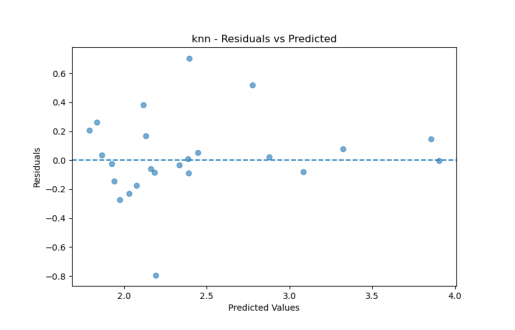

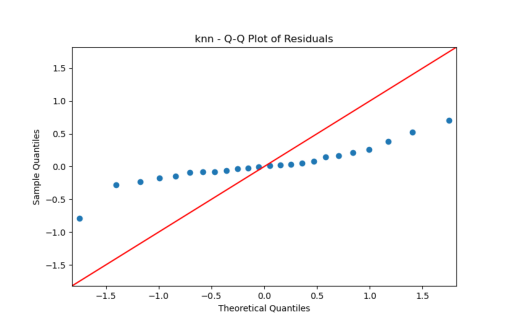

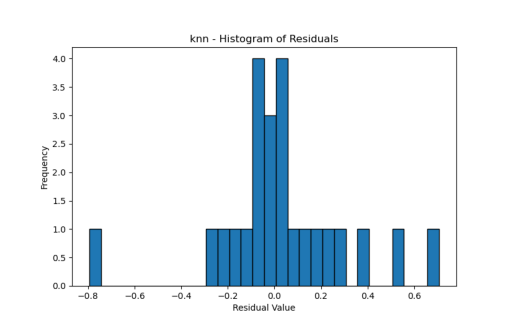

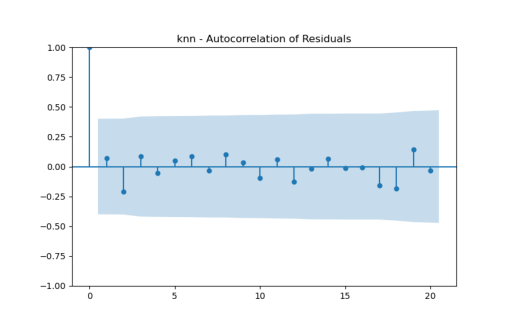

In [14]:
model_1 = next(gen_cl)
#first_cl.keys()

for key, values in model_1.items():
    if key == "best_params":
        print(f"Best parameters for {model_1['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_1['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_1['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_1['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_1["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_1['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
    elif key == "summary":
        print(f"Summary for {model_1['model']}:")
        display(values)

Summary for linear:


,mean,std
mape,7328947424854923.00,14310151982280624.00
smape,27.89,15.23
mae,0.47,0.11
rmse,0.60,0.18
mse,0.40,0.45
r2,0.58,0.77
ljung_box_pval,0.44,0.30
shapiro_pval,0.36,0.31
jarque_bera_pval,0.46,0.30
breusch_pagan_pval,0.32,0.25


Best parameters for linear:


{'model__fit_intercept': True, 'model__positive': True}

Best model for linear:


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LinearRegression(positive=True))])

Best fold for linear:


962

Best fold metrics for linear:


,fold,param_idx,mape,smape,mae,rmse,mse,r2,ljung_box_pval,shapiro_pval,jarque_bera_pval,breusch_pagan_pval
3845,962,1,7.99,8.07,0.18,0.24,0.06,0.91,0.90,0.11,0.33,0.97


Residual plots for linear:


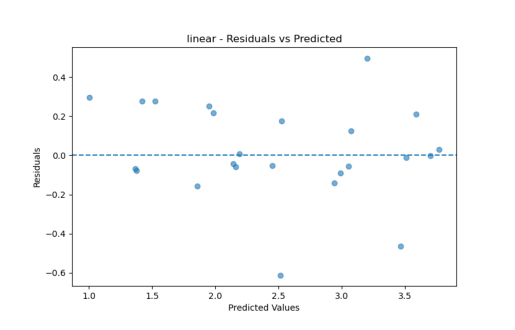

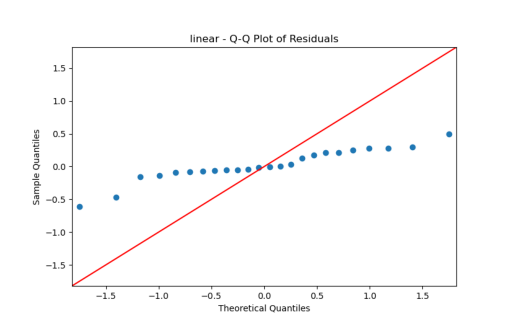

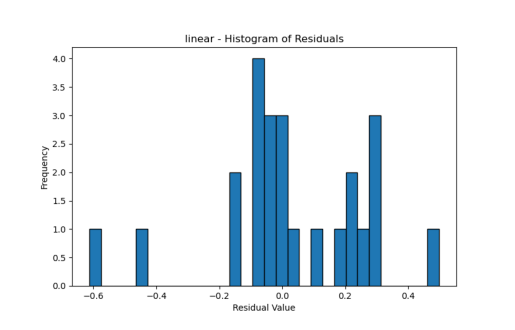

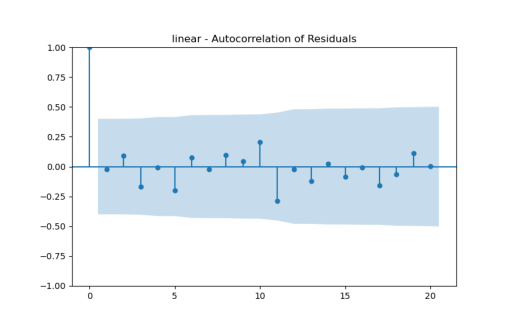

In [15]:
model_2 = next(gen_cl)
#first_cl.keys()

for key, values in model_2.items():
    if key == "best_params":
        print(f"Best parameters for {model_2['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_2['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_2['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_2['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_2["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_2['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
    elif key == "summary":
        print(f"Summary for {model_2['model']}:")
        display(values)

Summary for ridge:


,mean,std
mape,7295696526577203.00,14133515252164302.00
smape,27.27,15.02
mae,0.46,0.14
rmse,0.60,0.29
mse,0.44,3.17
r2,0.49,6.20
ljung_box_pval,0.45,0.30
shapiro_pval,0.38,0.31
jarque_bera_pval,0.47,0.30
breusch_pagan_pval,0.32,0.25


Best parameters for ridge:


{'model__alpha': 10.0}

Best model for ridge:


Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=10.0))])

Best fold for ridge:


962

Best fold metrics for ridge:


,fold,param_idx,mape,smape,mae,rmse,mse,r2,ljung_box_pval,shapiro_pval,jarque_bera_pval,breusch_pagan_pval
3847,962,3,8.37,7.84,0.18,0.25,0.06,0.91,0.67,0.46,0.40,0.78


Residual plots for ridge:


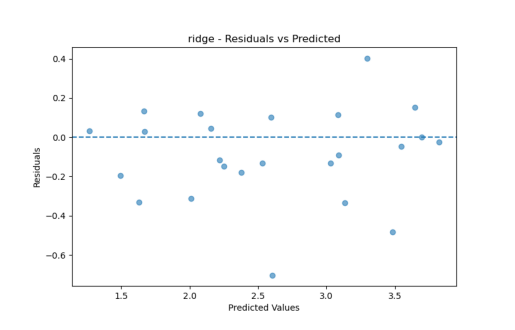

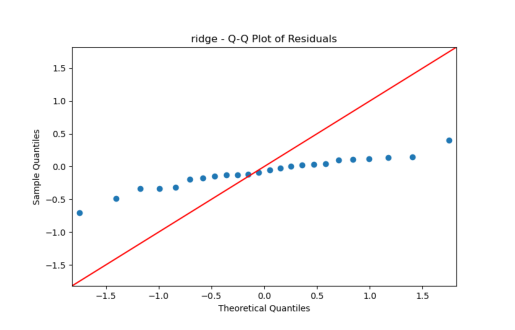

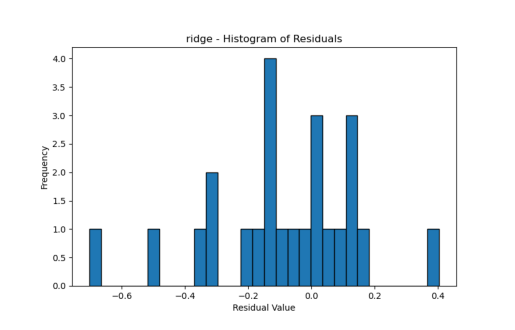

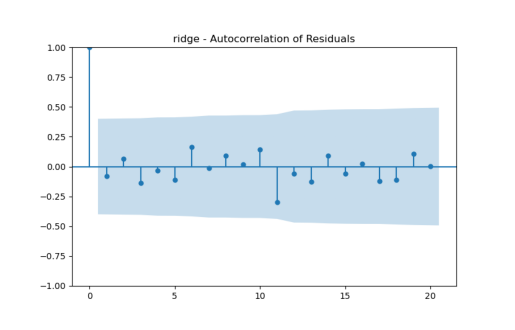

In [16]:
model_3 = next(gen_cl)
#first_cl.keys()

for key, values in model_3.items():
    if key == "best_params":
        print(f"Best parameters for {model_3['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_3['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_3['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_3['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_3["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_3['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
    elif key == "summary":
        print(f"Summary for {model_3['model']}:")
        display(values)

Summary for lasso:


,mean,std
mape,7316649233915581.00,14156685037630288.00
smape,27.37,14.97
mae,0.46,0.12
rmse,0.60,0.20
mse,0.40,0.93
r2,0.57,1.79
ljung_box_pval,0.45,0.30
shapiro_pval,0.37,0.31
jarque_bera_pval,0.46,0.30
breusch_pagan_pval,0.32,0.25


Best parameters for lasso:


{'model__alpha': 0.01}

Best model for lasso:


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.01, max_iter=10000))])

Best fold for lasso:


962

Best fold metrics for lasso:


,fold,param_idx,mape,smape,mae,rmse,mse,r2,ljung_box_pval,shapiro_pval,jarque_bera_pval,breusch_pagan_pval
3845,962,1,8.19,7.91,0.18,0.23,0.05,0.92,0.59,0.29,0.32,0.87


Residual plots for lasso:


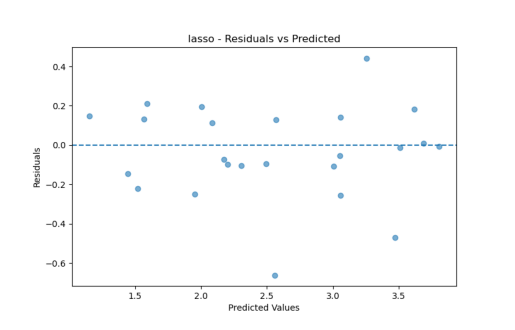

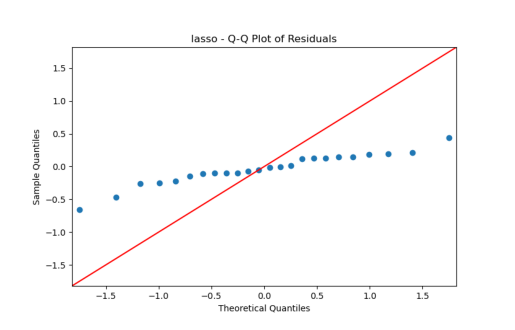

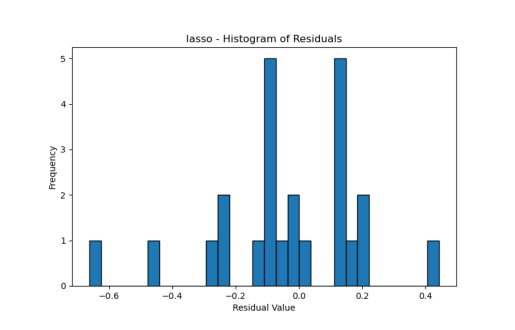

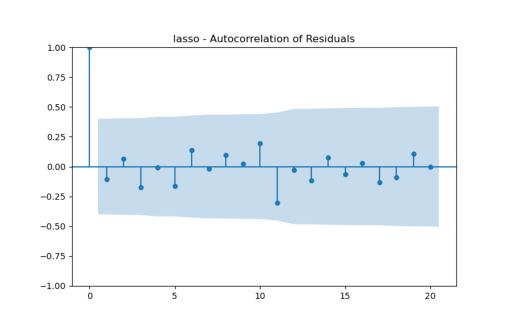

In [17]:
model_4 = next(gen_cl)
#first_cl.keys()

for key, values in model_4.items():
    if key == "best_params":
        print(f"Best parameters for {model_4['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_4['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_4['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_4['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_4["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_4['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
            plt.close()
    elif key == "summary":
        print(f"Summary for {model_4['model']}:")
        display(values)

Summary for tree:


,mean,std
mape,6902745952430691.00,14177141138271932.00
smape,29.96,15.12
mae,0.52,0.12
rmse,0.67,0.17
mse,0.47,0.26
r2,0.51,0.31
ljung_box_pval,0.45,0.30
shapiro_pval,0.40,0.31
jarque_bera_pval,0.50,0.31
breusch_pagan_pval,0.32,0.25


Best parameters for tree:


{'model__max_depth': 5,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 10}

Best model for tree:


Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=4,
                                       min_samples_split=10))])

Best fold for tree:


3624

Best fold metrics for tree:


,fold,param_idx,mape,smape,mae,rmse,mse,r2,ljung_box_pval,shapiro_pval,jarque_bera_pval,breusch_pagan_pval
97829,3624,8,19.27,17.40,0.25,0.30,0.09,0.85,0.17,0.64,0.67,0.40


Residual plots for tree:


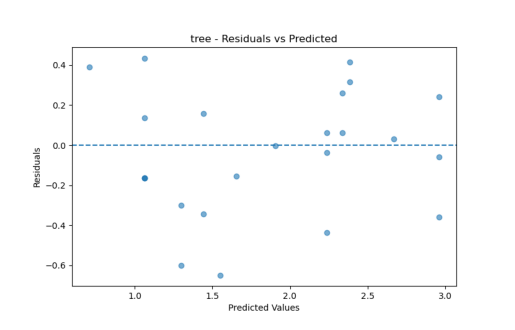

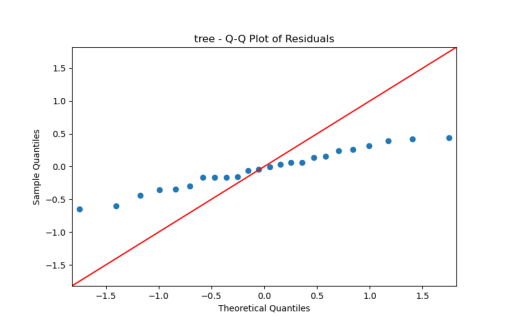

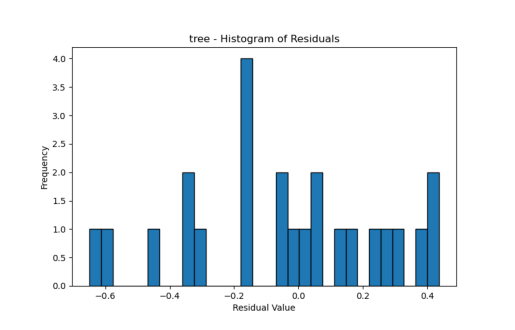

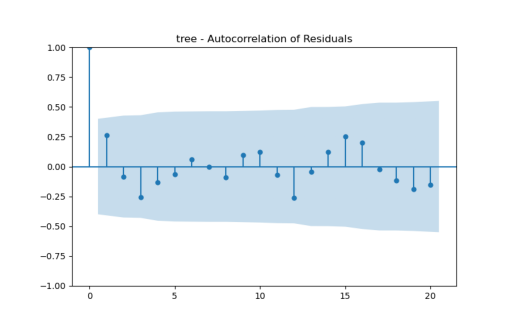

In [18]:
model_5 = next(gen_cl)
#first_cl.keys()

for key, values in model_5.items():
    if key == "best_params":
        print(f"Best parameters for {model_5['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_5['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_5['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_5['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_5["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_5['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
            plt.close()
    elif key == "summary":
        print(f"Summary for {model_5['model']}:")
        display(values)

Training Folds: 100%|██████████| 3632/3632 [26:32<00:00,  2.28it/s]


Summary for rf:


,mean,std
mape,11418972787369240.00,22615382271949120.00
smape,29.14,14.73
mae,0.53,0.14
rmse,0.67,0.18
mse,0.48,0.29
r2,0.52,0.29
ljung_box_pval,0.35,0.31
shapiro_pval,0.42,0.31
jarque_bera_pval,0.53,0.28
breusch_pagan_pval,0.29,0.23


Best parameters for rf:


{'model__max_depth': 7,
 'model__max_features': 'sqrt',
 'model__n_estimators': 100}

Best model for rf:


Pipeline(steps=[('model',
                 RandomForestRegressor(max_depth=7, max_features='sqrt'))])

Best fold for rf:


np.int64(668)

Best fold metrics for rf:


,fold,param_idx,mape,smape,mae,rmse,mse,r2,ljung_box_pval,shapiro_pval,jarque_bera_pval,breusch_pagan_pval
5341,668,5,6.20,5.93,0.12,0.17,0.03,0.94,0.54,0.15,0.18,0.05


Residual plots for rf:


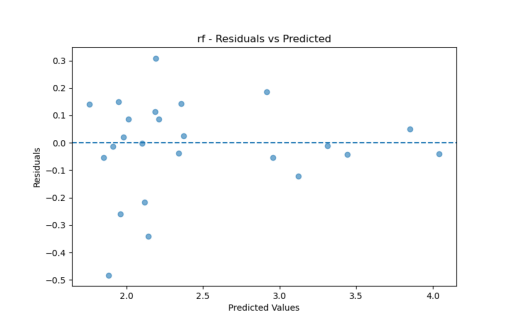

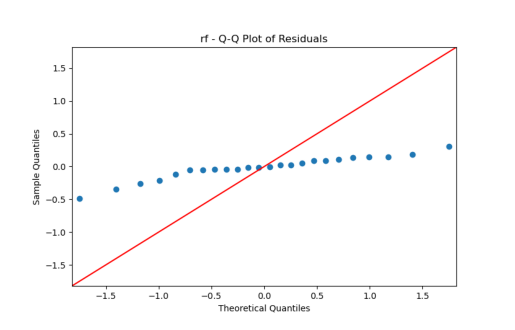

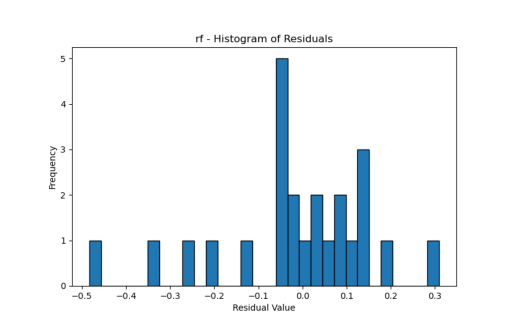

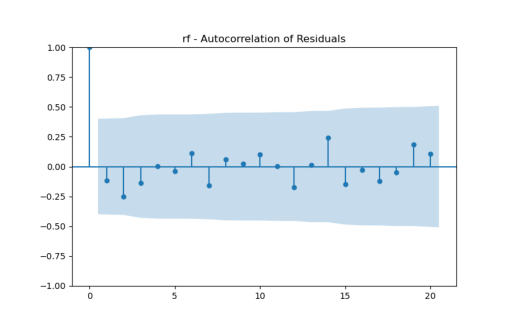

In [19]:
model_6 = next(gen_cl)
#first_cl.keys()

for key, values in model_6.items():
    if key == "best_params":
        print(f"Best parameters for {model_6['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_6['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_6['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_6['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_6["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_6['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
            plt.close()
    elif key == "summary":
        print(f"Summary for {model_6['model']}:")
        display(values)

In [ ]:
model_7 = next(gen_cl)
#first_cl.keys()

for key, values in model_7.items():
    if key == "best_params":
        print(f"Best parameters for {model_7['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_7['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_7['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_7['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_7["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_7['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
            plt.close()
    elif key == "summary":
        print(f"Summary for {model_7['model']}:")
        display(values)

Training Folds:   2%|▏         | 55/3632 [03:15<2:44:14,  2.75s/it]

In [ ]:
model_8 = next(gen_cl)
#first_cl.keys()

for key, values in model_8.items():
    if key == "best_params":
        print(f"Best parameters for {model_8['model']}:")
        display(values)
    elif key == "best_model":
        print(f"Best model for {model_8['model']}:")
        display(values)
    elif key == "best_fold":
        print(f"Best fold for {model_8['model']}:")
        display(values)
    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_8['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_8["model"]
        df_best_metrcis.append(dfm)
    elif key == "residual_plots":
        print(f"Residual plots for {model_8['model']}:")
        for plot_name, plot_path in values.items():
            plt.imshow(plt.imread(plot_path))
            plt.axis('off')
            plt.show()
            plt.close()
    elif key == "summary":
        print(f"Summary for {model_8['model']}:")
        display(values)

In [ ]:
# Generador TF
gen_tf = run_tf_generator(
    df,
    target_col="vel_viento",
    T_days=tau,
    tf_configs=tf_configs,
    metrics_funcs=metrics_funcs,
    time_index="hora",
    extra_eval=residual_tests,
    output_dir="Results/tau21"
)

In [ ]:
model_1_tf = next(gen_tf)

for key, values in model_1_tf.items():
    if key == "best_hyperparams":
        print(f"Best hyperparameters for {model_1_tf['model']}:")
        display(values)

    elif key == "best_model":
        print(f"Input shape for {model_1_tf['model']} model:")
        print(values.input_shape)
        print(f"Best model for {model_1_tf['model']}:")
        values.summary()

    elif key == "best_fold":
        print(f"Best fold for {model_1_tf['model']}:")
        display(values)

    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_1_tf['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_1_tf["model"]
        df_best_metrcis.append(dfm)

    elif key == "residual_plots":
        print(f"Residual plots for {model_1_tf['model']}:")
        for plot_name, plot_path in values.items():
            img = plt.imread(plot_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            plt.close()

    elif key == "summary":
        print(f"Summary for {model_1_tf['model']}:")
        display(values)


In [ ]:
model_2_tf = next(gen_tf)

for key, values in model_2_tf.items():
    if key == "best_hyperparams":
        print(f"Best hyperparameters for {model_2_tf['model']}:")
        display(values)

    elif key == "best_model":
        print(f"Input shape for {model_2_tf['model']} model:")
        print(values.input_shape)
        print(f"Best model for {model_2_tf['model']}:")
        values.summary()

    elif key == "best_fold":
        print(f"Best fold for {model_2_tf['model']}:")
        display(values)

    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_2_tf['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_2_tf["model"]
        df_best_metrcis.append(dfm)

    elif key == "residual_plots":
        print(f"Residual plots for {model_2_tf['model']}:")
        for plot_name, plot_path in values.items():
            img = plt.imread(plot_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            plt.close()

    elif key == "summary":
        print(f"Summary for {model_2_tf['model']}:")
        display(values)



In [ ]:
model_3_tf = next(gen_tf)

for key, values in model_3_tf.items():
    if key == "best_hyperparams":
        print(f"Best hyperparameters for {model_3_tf['model']}:")
        display(values)

    elif key == "best_model":
        print(f"Input shape for {model_3_tf['model']} model:")
        print(values.input_shape)
        print(f"Best model for {model_3_tf['model']}:")
        values.summary()

    elif key == "best_fold":
        print(f"Best fold for {model_3_tf['model']}:")
        display(values)

    elif key == "best_fold_metrics":
        print(f"Best fold metrics for {model_3_tf['model']}:")
        display(values)
        dfm = values.copy()
        dfm["model"] = model_3_tf["model"]
        df_best_metrcis.append(dfm)

    elif key == "residual_plots":
        print(f"Residual plots for {model_3_tf['model']}:")
        for plot_name, plot_path in values.items():
            img = plt.imread(plot_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            plt.close()

    elif key == "summary":
        print(f"Summary for {model_3_tf['model']}:")
        display(values)

In [ ]:
df_best_final = pd.concat(df_best_metrcis, ignore_index=True)
df_best_final = df_best_final.drop(columns=["fold", "param_idx"]).sort_values(by=["rmse"], ascending=True)
df_best_final = df_best_final.reset_index(drop=True)
display(df_best_final)